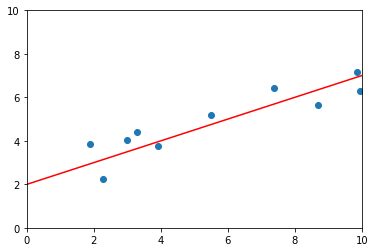

In [14]:
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

'''
beta_0과 beta_1 을 변경하면서 그래프에 표시되는 선을 확인한다.
beta_0 : 기울기 / beta_1 : 절편
'''

beta_0 = 0.5 # beta_0에 저장된 기울기 값을 조정 
beta_1 = 2 # beta_1에 저장된 절편 값을 조정 

plt.scatter(X, Y) # (x, y) 점 
plt.plot([0, 10], [beta_1, 10 * beta_0 + beta_1], c='r') # y = beta_0 * x + beta_1 에 해당하는 선 

plt.xlim(0, 10) # 그래프의 X축을 설정  
plt.ylim(0, 10) # 그래프의 Y축을 설정 

# 이미지를 표시
plt.savefig("test.png")

### 단순 선형 회귀 모델

### model.score(test_X, test_y) 를 이용한 성능 평가

> beta_0 :  [2.89804615]
> beta_1 :  [[2.90298892]]
> 모델 평가 점수 : 0.8948735905242706


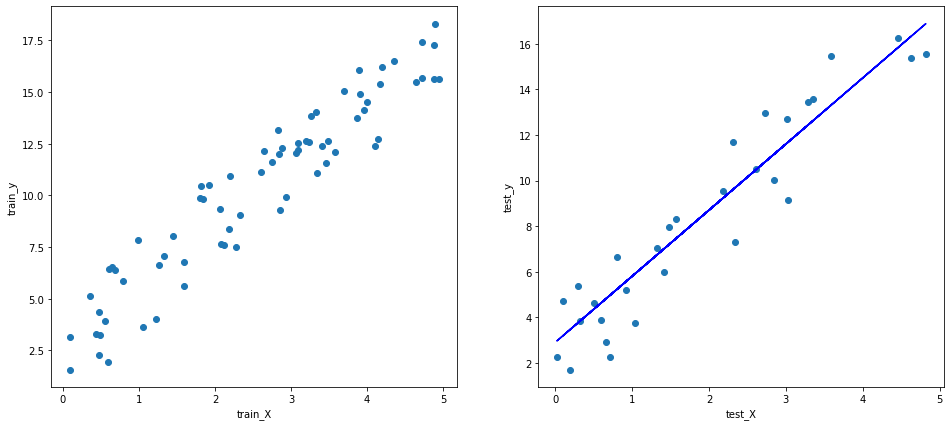

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

# 회귀 모델
from sklearn.linear_model import LinearRegression

"""
1. 데이터 생성
"""
def load_data():
    
    np.random.seed(0)
    
    X = 5*np.random.rand(100,1)
    y = 3*X + 5*np.random.rand(100,1)
    # x 와 y의 값이 무엇인지 먼저 확인한다.
    # 데이터 분리
    train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=0)
    return train_X, test_X, train_y, test_y

"""
2. 단순 선형회귀 모델 학습
"""
def regression_model(train_X, train_y):
    
    simplelinear = LinearRegression()
    
    simplelinear.fit(train_X, train_y)
    
    return simplelinear
    
# 그래프를 시각화하는 함수
def plotting_graph(train_X, test_X, train_y, test_y, predicted):
    fig, ax = plt.subplots(1,2, figsize=(16, 7))
    
    ax[0].scatter(train_X,train_y)
    ax[1].scatter(test_X,test_y)
    ax[1].plot(test_X, predicted, color='b')
    
    ax[0].set_xlabel('train_X')
    ax[0].set_ylabel('train_y')
    ax[1].set_xlabel('test_X')
    ax[1].set_ylabel('test_y')
    
    fig.savefig("result.png")

"""
3. 모델 학습 및 예측 결과 확인
"""
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    simplelinear = regression_model(train_X, train_y)
    
    predicted = simplelinear.predict(test_X)
    
    model_score = simplelinear.score(test_X, test_y)
    
    beta_0 = simplelinear.intercept_
    beta_1 = simplelinear.coef_
    
    print("> beta_0 : ",beta_0)
    print("> beta_1 : ",beta_1)
    
    print("> 모델 평가 점수 :", model_score)
    
    # 시각화 함수 호출하기
    plotting_graph(train_X, test_X, train_y, test_y, predicted)
    
    return predicted, beta_0, beta_1, model_score
    
    
if __name__=="__main__":
    main()

### loss function
* ∑ 
i
N
​
 (y 
(i)
 −(β 
0
​
 x 
(i)
 +β 
1
​
 )) 
2

Loss: 46.341726


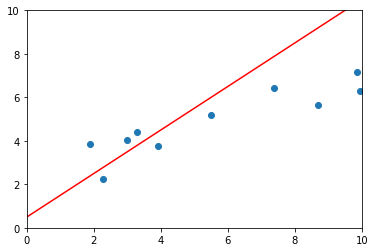

In [13]:
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def loss(x, y, beta_0, beta_1):
    N = len(x)
    
    '''
    x, y, beta_0, beta_1 을 이용해 loss값을 계산한 뒤 리턴 
    '''
    total_loss = 0
    for i in range(N):
        x_i = x[i] # 실제 인덱스 i번 째 x 값
        y_i = y[i] # 실제 인덱스 i번 째 y 값
        
        y_predicted = beta_0 * x_i + beta_1
        diff = (y_i - y_predicted) ** 2
        total_loss += diff
    
    return total_loss

X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]

beta_0 = 1 # 기울기
beta_1 = 0.5 # 절편

print("Loss: %f" % loss(X, Y, beta_0, beta_1))

plt.scatter(X, Y) # (x, y) 점 
plt.plot([0, 10], [beta_1, 10 * beta_0 + beta_1], c='r') # y = beta_0 * x + beta_1 에 해당하는 선 

plt.xlim(0, 10) # 그래프의 X축을 설정 
plt.ylim(0, 10) # 그래프의 Y축을 설정 
plt.savefig("test.png")  
plt.show(loss)


### 손실 함수 (loss function)를 이용한 성능 평가

beta_0: 0.430781
beta_1: 2.506181
Loss: 3.721640


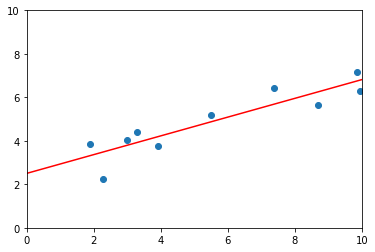

In [16]:
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
%matplotlib inline

def loss(x, y, beta_0, beta_1):
    N = len(x)
    
    x = np.array(x)
    y = np.array(y)
    total_loss = np.sum((y-(beta_0 * x + beta_1)) ** 2)
    
    return total_loss

X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]


# 행 1 열 10

# print(X)
train_X = np.array(X).reshape(-1, 1)
train_Y = np.array(Y).reshape(-1, 1)

# print(train_X)
'''
모델 트레이닝 
'''
lrmodel = LinearRegression()
lrmodel.fit(train_X, train_Y)

'''
loss가 최소가 되는 직선의 기울기와 절편을 계산함
'''

# coefficient 의 0번 째 값 (단순 회귀분석) 
beta_0 = lrmodel.coef_[0]   # lrmodel로 구한 직선의 기울기
beta_1 = lrmodel.intercept_ # lrmodel로 구한 직선의 y절편

print("beta_0: %f" % beta_0)
print("beta_1: %f" % beta_1)
print("Loss: %f" % loss(X, Y, beta_0, beta_1))

plt.scatter(X, Y) # (x, y) 점 
plt.plot([0, 10], [beta_1, 10 * beta_0 + beta_1], c='r') # y = beta_0 * x + beta_1 에 해당하는 선 

plt.xlim(0, 10) # 그래프의 X축을 설정 
plt.ylim(0, 10) # 그래프의 Y축을 설정 
plt.savefig("test.png")  
plt.show(loss)

## 선형 회귀 구현
1. x라는 값이 입력되면 ‘ax+b’라는 계산식을 통해 값을 산출하는 예측 함수를 정의
2. 실제 값 y와 예측 함수를 통해 계산한 예측값 간의 차이를 계산
3. a와 b를 업데이트하는 규칙을 정의하고 이를 바탕으로 a와 b의 값을 조정 
4. 위의 과정을 특정 반복 횟수만큼 반복
5. 반복적으로 수정된 a와 b를 바탕으로 ‘y=ax+b’라는 회귀식 정의 

#### 1) 랜덤 데이터 

a: [[3.33202156]] b: [[1.39096974]]


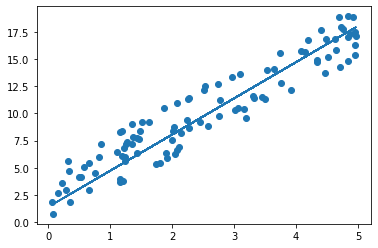

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use("Agg")
# 학습률(learning rate)를 설정한다.(권장: 0.0001~0.01)
learning_rate = 0.005
# 반복 횟수(iteration)를 설정한다.(자연수)
iteration = 100
def prediction(a, b, x):
    # 넘파이 배열 a,b,x를 받아서 'x*(transposed)a + b'를 계산하는 식을 만든다.
    equation = x * a.T + b
    
    return equation
    
def update_ab(a,b,x,error,lr):
    # a를 업데이트하는 규칙을 정의한다.
    delta_a = -(lr*(2/len(error))*(np.dot(x.T, error)))
    # b를 업데이트하는 규칙을 정의한다.
    delta_b = -(lr*(2/len(error))*np.sum(error))
    
    return delta_a, delta_b
    
def gradient_descent(x, y, iters):
    #초기값 
    a = np.zeros((1,1))
    b = np.zeros((1,1))
    
    for i in range(iters):
        #실제 값 y와 예측 값의 차이를 계산하여 error를 정의한다.
        error = y - prediction(a, b, x)
        a_delta, b_delta = update_ab(a,b,x,error,lr=learning_rate)
        a -= a_delta
        b -= b_delta
        
    return a, b

def plotting_graph(x,y,a,b):
    y_pred=a[0,0]*x+b
    plt.scatter(x, y)
    plt.plot(x, y_pred)
    plt.savefig("test.png")

def main():

    x = 5*np.random.rand(100,1)
    y = 3*x + 5*np.random.rand(100,1)
    
    a, b = gradient_descent(x,y,iters=iteration)
    
    print("a:",a, "b:",b)
    plotting_graph(x,y,a,b)
    
main()

#### 2) 데이터 지정

a: [[0.64716734]] b: [[0.96099787]]


(array([[0.64716734]]), array([[0.96099787]]))

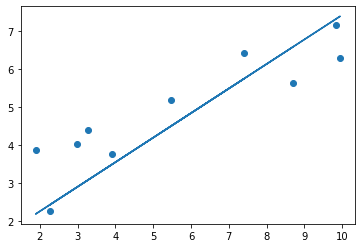

In [6]:
import numpy as np
 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use("Agg")
 
learning_rate = 1e-4
iteration = 10000

x = np.array([[8.70153760], [3.90825773], [1.89362433], [3.28730045], [7.39333004], [2.98984649], [2.25757240], [9.84450732], [9.94589513], [5.48321616]])
y = np.array([[5.64413093], [3.75876583], [3.87233310], [4.40990425], [6.43845020], [4.02827829], [2.26105955], [7.15768995], [6.29097441], [5.19692852]])

##입력값(x)과 변수(a,b)를 바탕으로 예측값을 출력하는 함수 
def prediction(a,b,x):
    #1.Numpy 배열 a,b,x를 받아서 'x*(transposed)a + b'를 계산하는 식 
    equation = x *a.T +b    
    return equation

##변수(a,b)의 값을 어느정도 업데이트할 지를 정해주는 함수 
def update_ab(a,b,x,error,lr):
    ## a를 업데이트하는 규칙 
    delta_a = -(lr*(2/len(error))*(np.dot(x.T, error)))
    ## b를 업데이트하는 규칙 
    delta_b = -(lr*(2/len(error))*np.sum(error))
    
    return delta_a, delta_b

# 반복횟수만큼 오차(error)를 계산하고 a,b의 값을 변경하는 함수 
def gradient_descent(x, y, iters):
    ## 초기값 a = 0, b = 0
    a = np.zeros((1,1))
    b = np.zeros((1,1))    
    
    for i in range(iters):
        #2.실제 값 y와 prediction 함수를 통해 예측한 예측값의 차이를 error로 정의 
        error = y - prediction(a,b,x) 
        #3.위에서  정의한 함수를 이용하여 a와 b 값의 변화값을 저장 
        a_delta, b_delta = update_ab(a,b,x,error,lr = learning_rate)
        ##a와 b의 값을 변화시킵니다.
        a -= a_delta
        b -= b_delta
    
    return a, b

##그래프를 시각화하는 함수 
def plotting_graph(x,y,a,b):
    y_pred=a[0,0]*x+b
    plt.scatter(x, y)
    plt.plot(x, y_pred)
    plt.savefig("test.png")


##실제 진행 절차를 확인할 수 있는 main함수 
def main():
    a, b = gradient_descent(x, y, iters=iteration)
    print("a:",a, "b:",b)
    plotting_graph(x,y,a,b)
    return a, b

main()

---

### 회귀 분석(Regression)알고리즘 구현

* gradient_descent: 항상 최적의 해를 얻을 수 있는 것은 아님 
* 그러므로 learning rate와 iteration을 잘 조절해서 얻도록 해야한다. 

### 최종 목표  
회귀분석 모델인 y = beta_1 * x + beta_0 를 만들어서 실제 값인 y와 일치시키는 것


### 과정
1. 예측 값과 실제 값을 최소화하기 위해서 loss 함수를 정의하고 
2. 예측 값과 실제 값 차이의 제곱을 loss로 정의해서 
3. 이 loss 값을 최소화 하게 된다면 결국 예측 값과 실제 값이 가장 가깝게 될 것이다. 
4. 그래서 loss 함수를 최소화 하는 방식으로 문제를 작성하는데,
5. loss 함수를 최소화하는 방법 중에 하나가 gradient_descent이다.

gradient_descent라는 방법은 loss 함수를 각각 beta_0 과 beta_1 로 미분한 값인<br>
### gradient_descent
6. delta_beta_0(beta0_delta)과 delta_beta_1(beta1_delta) 를 구해서 
7. delta_beta_0과 delta_beta_1 방향으로 beta를 업데이트 해주면→ loss가 증가하게 되므로,
8. delta_beta_0과 delta_beta_1의 **`반대방향`** 으로 (즉, **마이너스** 를 붙인) 업데이트를 해주면
9. loss가 최소화 된다. 

* 이때, gradient_descent 방법은 beta_1을 delta_beta_1의 `반대방향`으로 너무 한번에 업데이트 해도 안되며,<br> 너무 조금 업데이트 해도 안된다. 
* 한 점에서 최소점으로 이동해야 하므로, 가장 가파른(많이 움직이게 되는) 방향으로 이동하게 되는데<br> 과도하게 이동하였을 경우, 최소점과 떨어진 곳으로 이동하게 될 수도 있으며<br> 방향은 맞지만 강도를 강하게 주면 아예 벗어나게 될 수도 있다.
* 또한 방향을 너무 작게 주어서 천천히 움직여도 문제가 발생하므로 적당한 강도로 움직이는게 좋다.
* 여기서 어느 정도로 이동할지 control하는 부분을 **`learning rate`** 라고 한다.

실제 값과 예측 값이 최소화 되었을 때 beta_0과 beta_1의 값이 우리가 찾는 회귀 분석의 결괏값이 된다.

학습 횟수 : 0
학습 횟수 : 100
학습 횟수 : 200
학습 횟수 : 300
학습 횟수 : 400
학습 횟수 : 500
학습 횟수 : 600
학습 횟수 : 700
학습 횟수 : 800
학습 횟수 : 900
학습 횟수 : 1000
학습 횟수 : 1100
학습 횟수 : 1200
학습 횟수 : 1300
학습 횟수 : 1400
학습 횟수 : 1500
학습 횟수 : 1600
학습 횟수 : 1700
학습 횟수 : 1800
학습 횟수 : 1900
2000번의 학습 이후의 회귀 알고리즘 결과
beta_0: [0.21055839] beta_1: [0.75203751]


<ipython-input-9-d3cffff0b9fa>:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


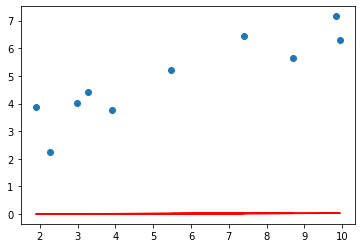

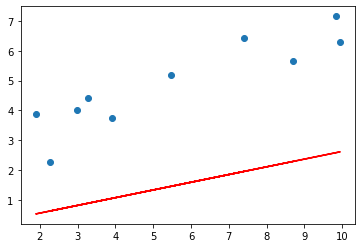

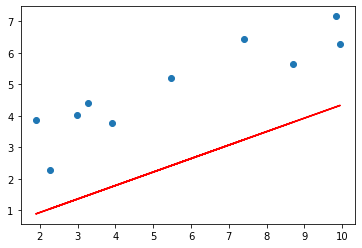

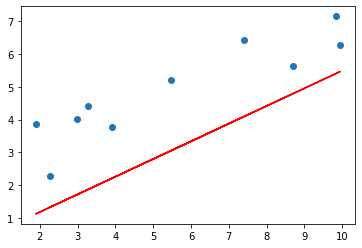

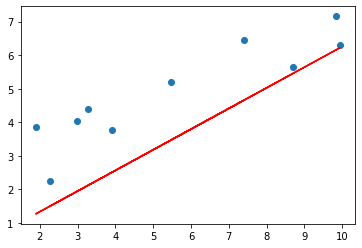

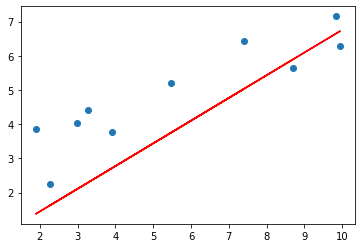

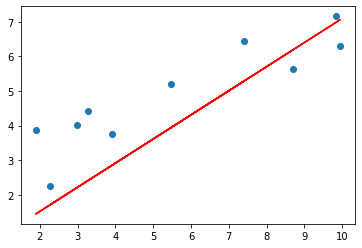

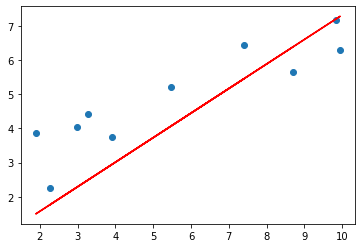

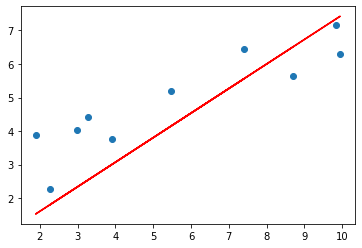

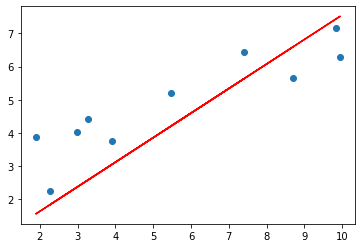

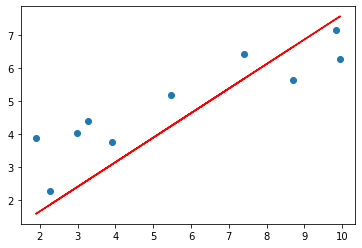

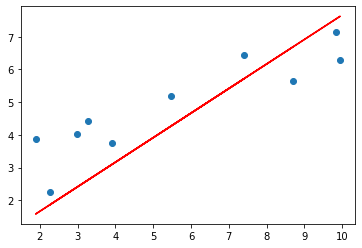

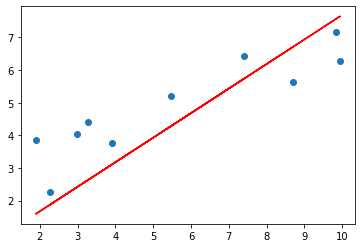

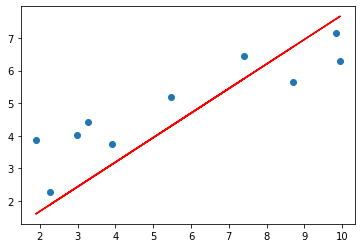

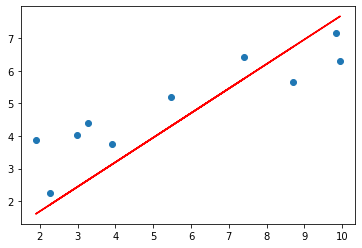

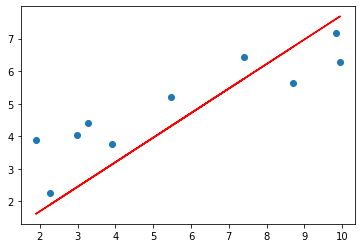

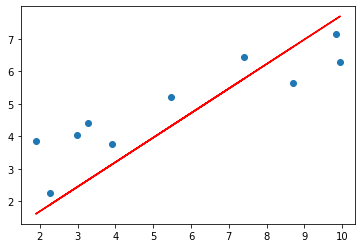

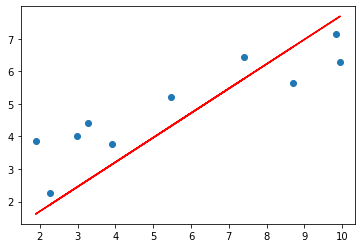

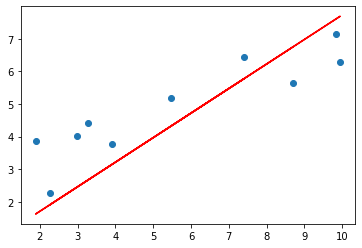

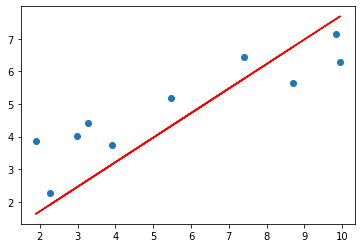

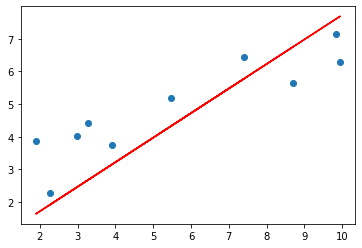

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터를 생성하고 반환하는 함수입니다.
def load_data():
    
    X = np.array([[8.70153760], [3.90825773], [1.89362433], [3.28730045], [7.39333004], [2.98984649], [2.25757240], [9.84450732], [9.94589513], [5.48321616]])
    y = np.array([[5.64413093], [3.75876583], [3.87233310], [4.40990425], [6.43845020], [4.02827829], [2.26105955], [7.15768995], [6.29097441], [5.19692852]])
    
    return X, y

"""
1.  입력값(X)과 beta_0,beta_1를 바탕으로 
    예측값(pre_y)을 계산하여 반환하는 함수를 구현
"""
def prediction(beta_0, beta_1, X):
    
    
    y_pred = (beta_1 * X + beta_0) 
    
    return y_pred
    

# beta_1와 beta_1 값을 업데이트 하는 규칙을 정의하는 함수입니다.
def update_beta(X, y, y_pred, beta_1, beta_0, lr):
    # 데이터의 개수 : n
    n = len(X)
    # n = X.shape[0]
    
    delta_1 = ((beta_1 * X + beta_0 -y) * X).sum() / n
    delta_1 = np.sum((beta_1*X+beta_0 -y) * X) / n
    
    
    delta_0 = ((beta_1 * X + beta_0 -y) ).sum() / n
    delta_0 = np.sum((beta_1*X+beta_0 -y)) / n
    return delta_0, delta_1
    

"""
2.  반복 횟수만큼 오차(loss)를 계산하고 
    beta_0,beta_1의 값을 변경하는 함수 
    
    #1. 실제 값 y와 prediction 함수를 통해 예측한 
    예측 값 pred_y 간의 차이(loss)를 계산 
    
    loss는 실제값(y) - 예측값(pred_y)으로 정의 
    
    #2. 구현된 함수를 이용하여
    beta_0와 beta_1 의 변화값을 각각 beta0_delta, beta1_delta에 저장
"""
def gradient_descent(X, y, iters, lr):
    
    beta_0 = np.zeros((1,1))
    beta_1 = np.zeros((1,1))
    
    for i in range(iters):
        
        y_pred = prediction(beta_0, beta_1, X)
        loss = np.mean(np.square(y - y_pred))

        beta0_delta, beta1_delta = update_beta(X, y, y_pred, beta_1, beta_0, lr)
        """
        beta0_delta, beta1_delta = 최소화할 loss function을 beta0와 beta1으로 미분한 값
        이 값은 loss function을 가장 빠르게 증가시키는 방향
        
        loss function을 최소화 해야하므로, 앞에 - 마이너스를 붙여 감소시키도록 
        beta0_delta와 beta1_delta의 (방향을) 변경한다. """
        # Gradient Descent 업데이트 
        beta_0 = beta_0 - lr* beta0_delta
        beta_1 = beta_1 - lr* beta1_delta
        # 자동적으로 loss 최소화
        # 100번의 학습마다 그래프 출력하기
        if i%100==0:
            print("학습 횟수 :",i)
            plotting_graph(X,y,beta_0,beta_1)
        
    return beta_0, beta_1


# 그래프를 시각화하는 함수입니다.
def plotting_graph(X,y,beta_0,beta_1):
    
    y_pred = beta_0 + beta_1[0,0] * X
    
    fig = plt.figure()
    
    plt.scatter(X, y)
    plt.plot(X, y_pred,c='r')
    
    plt.savefig("test.png")


# 회귀 알고리즘 구현 진행을 위한 main() 함수입니다.  
def main():
    
    # 학습을 위해 필요한 파라미터입니다. 
    lr = 1e-4
    iteration = 2000
    
    X, y = load_data()
    
    beta_0, beta_1 = gradient_descent(X, y, iteration, lr)
    
    print("{}번의 학습 이후의 회귀 알고리즘 결과".format(iteration))
    print("beta_0:",beta_0[0], "beta_1:",beta_1[0])
    
    plotting_graph(X,y,beta_0,beta_1)
    
    return beta_0, beta_1

if __name__=="__main__":
    main()

### Normalization

In [23]:
def main():
    print(matrix_tutorial())

def matrix_tutorial():
    A = np.array([[1,4,5,8], [2,1,7,3], [5,4,5,9]])

    # 1
    A = A / np.sum(A)

    # 2
    return np.var(A)

if __name__ == "__main__":
    main()

0.0020861911294010062
